# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

# set option to NOT truncate columns in DF display
pd.set_option('display.max_columns', None)
# disable copy/slice dataframe warning
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

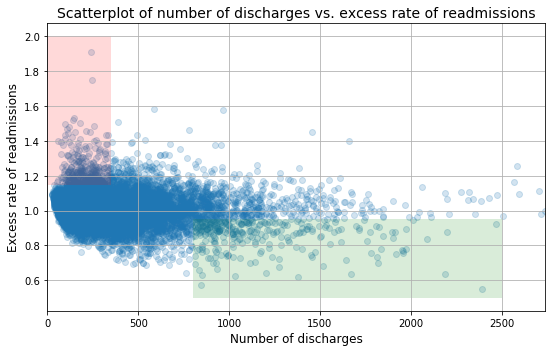

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [17]:
# check out the dataframe
df = clean_hospital_read_df
#df.head()

In [18]:
# drop NAs
df = df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
df.columns = ['Discharges', 'Ratio']

In [19]:
# reset index and coerce Discharges to int
df.reset_index(drop=True);
df.Discharges = df.Discharges.astype(int);

In [20]:
df.describe()

,Discharges,Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Discharges    11497 non-null int64
Ratio         11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


### A. Do you agree with the above analysis and recommendations? Why or why not?

## Hypothesis Test
NULL HYPOTHESIS : H0: mu1 = mu2  
There is no difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000

ALTERNATE HYPOTHESIS : H1: mu1 ≠ mu</sub>2
There is a significant difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000

In [28]:
# small hospitals: < 100 discharges

sm_hospitals = df[df.Discharges<100]
sm_hospitals.describe()

,Discharges,Ratio
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


In [36]:
type(lg_hospitals)

pandas.core.frame.DataFrame

In [29]:
# large hospitals: > 1000 discharges

lg_hospitals = df[(df.Discharges>1000)]
lg_hospitals.describe()

,Discharges,Ratio
count,463.000000,463.000000
mean,1383.427646,0.978335
std,459.109724,0.120007
min,1002.000000,0.549500
25%,1107.000000,0.907900
50%,1242.000000,0.986400
75%,1512.000000,1.057100
max,6793.000000,1.454300


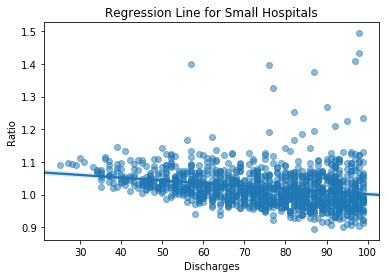

In [34]:
# number of discharges v. ratio of readmission for small hospitals

ax = sns.regplot(x='Discharges', y='Ratio', data=sm_hospitals, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line for Small Hospitals');

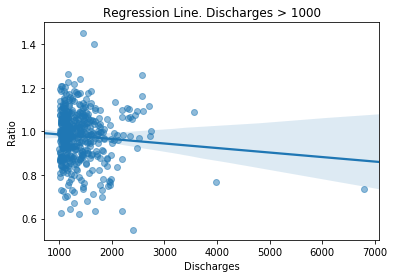

In [35]:
# number of discharges v. ratio of readmission for large hospitals

ax = sns.regplot(x='Discharges', y='Ratio', data=large_hospitals, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line. Discharges > 1000');

# Hypothesis
"There is a significant correlation between hospital capacity (number of discharges) and readmission rates."
    <blockquote>
    H0: There is no correlation between the number of discharges and the readmission rate (H0: r = 0).  
    H1: A hospital's readmission rate is correlated with the number of discharges (H1: r != 0).
    </blockquote>
As our hypothesis test is testing for correlation, we will be using the Pearson correlation coefficient, and reporting statistical significance for  𝛼  = .01

In [46]:
r = stats.pearsonr(df.Discharges, df.Ratio)
print('Pearson\'s R: ',round(r[0], 3))
print('p-value',round(r[1], 3))

Pearson's R:  -0.097
p-value 0.0


## Results
The p-value under the Pearson's Correlation Coefficient is very low (rounded to 0.0), so the null hypothesis that there is no correlation between hospital size and readmission rate (H0: r = 0) must be rejected. The correlation coefficient is -0.097, so there is a small negative correlation between the size of a hospital and its excess readmissions. A negative correlation means that readmission rates drop slightly as the number of discharges increases. 